In [5]:
# 한국어데이터 : konlpy
# kkma : 서울대, 최신단어반영x
# okt : 트위터에서 만든 형태소 분석기

from konlpy.tag import Kkma, Okt

okt = Okt()
okt.nouns("아버지가방에들어가신다.")

['아버지', '가방']

In [6]:
kkma = Kkma()
kkma.nouns("아버지가방에들어가신다.")

['아버지', '아버지가방', '가방']

## 빈도분석(문재인, 박근혜 대통령 연설문)

In [8]:
f = open("speech_moon.txt", 'rt', encoding = 'utf-8')
moon = f.read()
f.close()

f = open("speech_park.txt", 'rt', encoding = 'utf-8')
park = f.read()
f.close()

In [9]:
# 기본 빈도 분석
okt = Okt()

moon_nouns = []
for i in okt.nouns(moon):
    if len(i) >= 2:
        moon_nouns.append(i)
print(moon_nouns)

['정권', '교체', '정치', '교체', '시대', '교체', '불비', '불명', '고사', '남쪽', '언덕', '나뭇가지', '동안', '지도', '한번', '하늘', '한번', '울면', '천지', '뒤흔듭니', '동안', '정치', '거리', '시대', '정치', '이상', '남쪽', '나뭇가지', '이제', '국민', '높이', '크게', '오늘', '대통령선거', '출마', '국민', '선언', '우리나라', '대통령', '존경', '국민', '여러분', '대통령', '우리나라', '대통령', '소수', '특권', '나라', '보통사람', '주인', '우리나라', '우리나라', '우리', '조금', '우리나라', '대통령', '지금', '우리', '보통사람', '지도', '나라', '주인', '행세', '주인', '이제', '정치', '참여', '추구', '우리나라', '정치인', '나라', '시민', '직접', '정치', '정책', '과정', '참여', '나라', '시민', '동행', '정치', '추구', '우리나라', '특권', '불평등', '나라', '보통사람', '기회', '정의', '나라', '이제', '권력', '집단', '나라', '마음대로', '움직', '시대', '사람', '희생', '강요', '경제', '정치', '권력', '모두', '오늘', '문재인', '우리나라', '우리', '모두', '나라', '선언', '국민', '모두', '높이', '크게', '결심', '이유', '보통사람', '우리', '현실', '때문', '근본', '혁신', '전환', '나라', '절박', '때문', '지금', '우리', '우리', '사회', '이상', '경제성장', '과실', '소수', '부유', '대기업', '창고', '황금', '가득', '차지', '대부분', '보통사람', '취업', '불안', '주거', '불안', '고용', '불안', '건강', '불안', '노후', '불안', '불안', '이불', '매일', '잠자리', '국민', '

In [10]:
park_nouns = []
for i in okt.nouns(park):
    if len(i) >= 2:
        park_nouns.append(i)
print(park_nouns)

['존경', '국민', '여러분', '오늘', '국민', '대한민국', '만들기', '위해', '모든', '각오', '자리', '박근혜', '이번', '대통령선거', '출마', '선언', '국민', '여러분', '대한민국', '시간', '우리나라', '가난', '이기', '과정', '시절', '가슴', '깊이', '어머니', '흉탄', '고통', '어려움', '시간', '어머니', '빈자리', '대한', '책임감', '명감', '때문', '해주시', '국민', '여러분', '때문', '막중', '고통', '다시', '모두', '국민', '여러분', '때문', '그때', '다른', '가야', '개인', '대신', '국민', '공적', '시작', '각계', '각층', '국민', '국민', '애환', '국민', '어머니', '가족', '국민', '애환', '해결', '노력', '가장', '아버지', '다른', '고통', '아픔', '국민', '눈물', '나라', '외환위기', '국민', '고통', '모습', '보고', '수만', '고통', '치유', '조금', '보태', '위해', '정치', '시작', '오히려', '국민', '여러분', '존폐', '위기', '국민', '불신', '원성', '국민', '여러분', '신뢰', '테러', '목숨', '국민', '여러분', '기적', '다시', '박근혜', '동안', '혼자', '국민', '여러분', '신뢰', '성원', '덕분', '결코', '은혜', '보답', '이제', '국민', '여러분', '아픔', '해결', '국민', '모두', '각자', '대한민국', '모든', '생각', '국민', '홀로', '포기', '여러분', '변화', '박근혜', '반드시', '대한민국', '시오', '국민', '여러분', '우리', '지금', '세계', '경기', '침체', '분열', '갈등', '원칙', '자본주의', '도전', '직면', '국내', '저출산', '고령화', '성장', '소득', '격차', '심화', '폭풍', '

In [11]:
from collections import Counter

moon_counter = Counter(moon_nouns)
park_counter = Counter(park_nouns)

In [12]:
moon_top10 = moon_counter.most_common(10)
park_top10 = park_counter.most_common(10)
park_top10

[('국민', 74),
 ('여러분', 22),
 ('행복', 20),
 ('정부', 18),
 ('국가', 12),
 ('신뢰', 11),
 ('우리', 10),
 ('사람', 10),
 ('박근혜', 9),
 ('일자리', 9)]

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

moon_df = pd.DataFrame(moon_top10, columns = ['단어', '빈도']).sort_values("빈도")
park_df = pd.DataFrame(park_top10, columns = ['단어', '빈도']).sort_values("빈도")

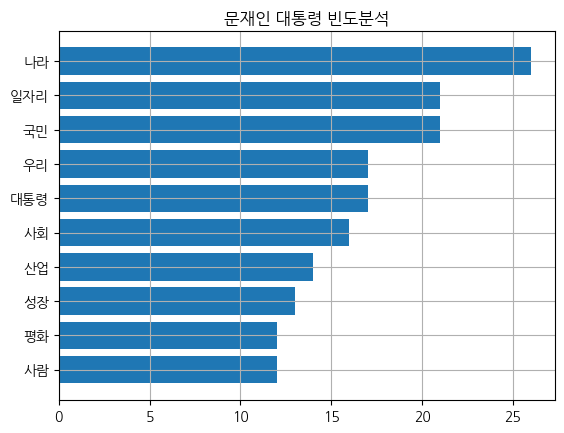

In [14]:
#시각화

#!pip install koreanize-matplotlib
import koreanize_matplotlib

plt.title("문재인 대통령 빈도분석")
plt.barh(moon_df['단어'], moon_df['빈도'])
plt.grid()
plt.show()

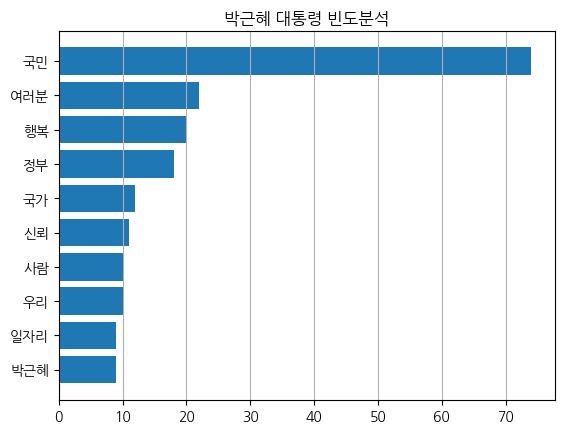

In [15]:
plt.title("박근혜 대통령 빈도분석")
plt.barh(park_df['단어'], park_df['빈도'])
plt.grid(axis = 'x')
plt.show()

In [16]:
# 빈도수에 따라 색을 설정하는 함수 정의
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if moon_counter[word] >= a:
        return "black"  # 검은색
    else:
        return "gray"  # 회색

a = pd.Series(moon_counter.values()).quantile(0.99) #상위 1%만 보겠음
a

13.169999999999959

In [17]:
#!pip install wordcloud

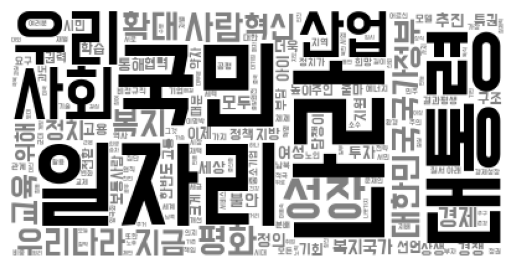

In [18]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white",
               font_path = "BMDOHYEON_ttf.ttf").generate_from_frequencies(moon_counter)

wc.recolor(color_func=custom_color_func)

plt.imshow(wc)
plt.axis("off")
plt.show()

## 워드클라우드 모양 변경

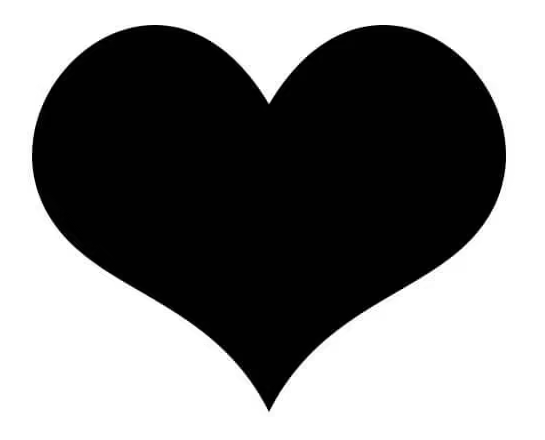

In [22]:
from PIL import Image

img = Image.open("하트.png")
img

In [24]:
#픽셀 단위로 변경
import numpy as np

img = np.array(Image.open("하트.png"))
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

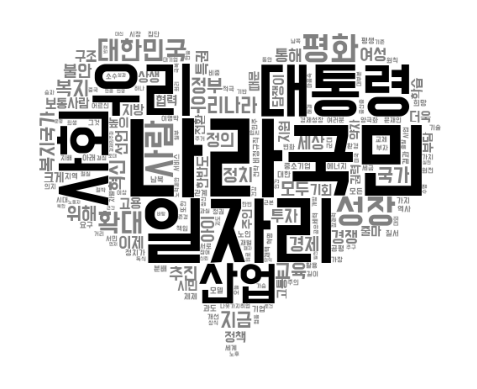

In [26]:
wc = WordCloud(background_color="white",
               font_path = "BMDOHYEON_ttf.ttf",
              mask = img).generate_from_frequencies(moon_counter)

wc.recolor(color_func=custom_color_func)

plt.imshow(wc)
plt.axis("off")
plt.show()

## 상대 빈도 분석
- 오즈비 분석

In [28]:
moon_df = pd.DataFrame(moon_counter.most_common(), columns = ['단어', '빈도'])
moon_df['대통령'] = "문재인"

park_df = pd.DataFrame(park_counter.most_common(), columns = ['단어', '빈도'])
park_df['대통령'] = "박근혜"

df = pd.concat([moon_df, park_df], ignore_index = True)

In [32]:
pivot_df = df.pivot_table(index = "단어", columns = "대통령",
              values = "빈도").fillna(0)

In [44]:
pivot_df["문재인 Ratio"] = (pivot_df['문재인'] + 1) / sum(pivot_df['문재인'] + 1)
pivot_df["박근혜 Ratio"] = (pivot_df['박근혜'] + 1) / sum(pivot_df['박근혜'] + 1)

pivot_df["Odds Ratio"] = pivot_df["문재인 Ratio"] / pivot_df["박근혜 Ratio"]
pivot_df.sort_values("Odds Ratio") #누가 더 많이 썼나

대통령,문재인,박근혜,문재인 Ratio,박근혜 Ratio,Odds Ratio
단어,,,,,
행복,0.0,20.0,0.000438,0.012000,0.036518
박근혜,0.0,9.0,0.000438,0.005714,0.076687
과제,0.0,6.0,0.000438,0.004000,0.109553
핵심,0.0,5.0,0.000438,0.003429,0.127812
실천,0.0,5.0,0.000438,0.003429,0.127812
...,...,...,...,...,...
나라,26.0,3.0,0.011832,0.002286,5.176380
세상,6.0,0.0,0.003067,0.000571,5.368098
여성,6.0,0.0,0.003067,0.000571,5.368098


In [47]:
# 박근혜 : 행복
# 문재인 : 복지국가

for i in kkma.sentences(park): #문장 토큰화
    if  "행복" in i:
        print(i)

존경하는 국민 여러 분! 저는 오늘, 국민 한 분 한 분의 꿈이 이루어지는 행복한 대한민국을 만들기 위해, 저의 모든 것을 바치겠다는 각오로 이 자리에 섰습니다.
국가는 발전했고, 경제는 성장했다는 데, 나의 삶은 나아지지 않았고, 나의 행복은 커지지 않았습니다.
과거에는 국가의 발전이 국민의 행복으로 이어졌습니다.
개인의 창의력이 중요한 지식기반사회에서는 국민 한 사람, 한 사람이 중요한 시대이고, 국민 개개인이 행복해 지고 자신의 잠재력과 끼를 최대한 발휘할 수 있어야만 국가가 발전할 수 있습니다.
이제 국정운영의 패러다임을 국가에서 국민으로, 개인의 삶과 행복 중심으로 확 바꿔야 합니다.
국민 개개인의 꿈을 향한 노력이 국가를 발전시키고 국가 발전이 국민 행복으로 선 순환되는 ‘ 국민 행복의 길’, 이 길이 저 박근 혜가 가고자 하는 새로운 국가 발전의 길입니다.!
저는 ‘ 경제 민주화 실현’, ‘ 일자리 창출’, 그리고 ‘ 한국형 복지의 확립’ 을 국민 행복을 위한 3대 핵심과제로 삼겠습니다.
국민 행복의 길을 열어 갈 첫 번째 과제로, 저는 경제 민주화를 통해 중소기업인을 비롯한 경제적 약자들의 꿈이 다시 샘솟게 하겠습니다.
국민 행복의 길을 열어 갈 두 번째 과제로, 저는 좋은 일자리 창출을 통해 일하고 싶은 사람들이 꿈을 이룰 수 있도록 하겠습니다.
국민 행복의 길을 열어 갈 세 번째 과제로, 우리의 실정에 맞으면서 국민에게 실질적인 도움을 주는 생애 주기별 맞춤 형 복지 제도를 확립하겠습니다.
저는 국민 행복을 위해 ‘ 경제 민주화- 일자리- 복지 ’를 아우르는 ( 가칭)‘ 오천만 국민 행복 플랜’ 을 수립하여 추진하겠습니다.
모든 계층의 국민이 함께 참여해 만들고, 정부와 기업, 지역사회가 함께 연대해 실천해 가는 국민 행복의 청사진을 마련하겠습니다.
50년 전 경제개발 5개년 계획이 산업화의 기적을 이뤄 냈듯,‘ 오천만 국민 행복 플랜’ 을 통해, 앞으로 50년 이상 지속될 수 있는 국민 행복의 초석을 마련하겠습니다!
저는 지속가능한 국민 행

In [52]:
for i in kkma.sentences(moon): 
    if  "복지국가" in i:
        print(i)

3. ‘ 강한 복지국가 ’를 향해 담대하게 나아가겠습니다.
2백 년 전 이와 같은 소득 재분배, 복지국가의 사상을 가진 위정자가 지구상 어디에 또 있었겠습니까?
이제 우리는 복지국가를 향해 담대하게 나아갈 때입니다.
부자 감세, 4대 강 사업 같은 시대착오적 과오를 청산하고, 하루빨리 복지국가로 가야 합니다.
우리는 지금 복지국가로 가느냐,
강한 복지국가 일 수록 국가 경쟁력도 더 높습니다.
결국 복지국가로 가는 길은 사람에 대한 투자, 일자리 창출, 자영업 고통 경감, 삶의 질 향상 등 1석 4조의 효과를 만나는 길입니다.
우리는 과감히 강한 보편적 복지국가로 가야 합니다.


## 실습
### 이명박, 노무현 대통령이 다른 대통령(3명)에 비해 많이 나온 단어 각각 10개 찾기

In [138]:
speech = pd.read_csv("speeches_presidents.csv")
speech

,president,value
0,문재인,정권교체 하겠습니다! 정치교체 하겠습니다! 시대교체 하겠습니다! ‘불비불...
1,박근혜,"존경하는 국민 여러분! 저는 오늘, 국민 한 분 한 분의 꿈이 이루어지는 행복한 대..."
2,이명박,"존경하는 국민 여러분, 사랑하는 한나라당 당원 동지 여러분! 저는 오늘 무거운 책임..."
3,노무현,어느때인가 부터 제가 대통령이 되겠다고 말을 하기 시작했습니다. 많은 분들이 제게 ...


In [166]:
moon = speech.iloc[0, 1]

moon_nouns = []
for i in okt.nouns(moon):
    if len(i) >= 2:
        moon_nouns.append(i)

In [168]:
park = speech.iloc[1, 1]

park_nouns = []
for i in okt.nouns(park):
    if len(i) >= 2:
        park_nouns.append(i)

In [170]:
lee = speech.iloc[2, 1]

lee_nouns = []
for i in okt.nouns(lee):
    if len(i) >= 2:
        lee_nouns.append(i)

In [172]:
no = speech.iloc[3, 1]

no_nouns = []
for i in okt.nouns(no):
    if len(i) >= 2:
        no_nouns.append(i)

In [174]:
from collections import Counter

moon_counter = Counter(moon_nouns)
park_counter = Counter(park_nouns)
lee_counter = Counter(lee_nouns)
no_counter = Counter(no_nouns)

In [176]:
moon_df = pd.DataFrame(moon_counter.most_common(), columns = ['단어', '빈도'])
moon_df['대통령'] = "문재인"

park_df = pd.DataFrame(park_counter.most_common(), columns = ['단어', '빈도'])
park_df['대통령'] = "박근혜"

lee_df = pd.DataFrame(lee_counter.most_common(), columns = ['단어', '빈도'])
lee_df['대통령'] = '이명박'

no_df = pd.DataFrame(no_counter.most_common(), columns = ['단어', '빈도'])
no_df['대통령'] = "노무현"


df = pd.concat([moon_df, park_df, lee_df, no_df], ignore_index = True)

In [178]:
pivot_df = df.pivot_table(index = "단어", columns = "대통령",
              values = "빈도").fillna(0)

In [180]:
pivot_df["이명박 Ratio"] = (pivot_df['이명박'] + 1) / sum(pivot_df['이명박'] + 1)
pivot_df["노무현 Ratio"] = (pivot_df['노무현'] + 1) / sum(pivot_df['노무현'] + 1)

pivot_df["이명박 Odds Ratio"] = pivot_df["이명박 Ratio"] / (
    pivot_df["문재인"] + pivot_df["박근혜"] + pivot_df["노무현"] + 3)

pivot_df["노무현 Odds Ratio"] = pivot_df["노무현 Ratio"] / (
    pivot_df["문재인"] + pivot_df["박근혜"] + pivot_df["이명박"] + 3)

In [182]:
pivot_df["이명박 Odds Ratio"] = pd.to_numeric(pivot_df["이명박 Odds Ratio"], errors='coerce')

lee_odds = pivot_df[['노무현', '이명박', '박근혜', '문재인', '이명박 Odds Ratio']].sort_values("이명박 Odds Ratio")

lee_odds

대통령,노무현,이명박,박근혜,문재인,이명박 Odds Ratio
단어,,,,,
정부,3.0,0.0,18.0,9.0,0.000020
복지,1.0,0.0,7.0,10.0,0.000031
산업,0.0,0.0,4.0,14.0,0.000031
신뢰,3.0,0.0,11.0,2.0,0.000035
정책,2.0,0.0,8.0,5.0,0.000036
...,...,...,...,...,...
한나라당,2.0,7.0,0.0,0.0,0.001051
당원,0.0,4.0,0.0,0.0,0.001094
동지,0.0,4.0,0.0,0.0,0.001094


In [184]:
pivot_df["노무현 Odds Ratio"] = pd.to_numeric(pivot_df["노무현 Odds Ratio"], errors='coerce')

no_odds = pivot_df[['노무현', '이명박', '박근혜', '문재인', '노무현 Odds Ratio']].sort_values("노무현 Odds Ratio")

no_odds

대통령,노무현,이명박,박근혜,문재인,노무현 Odds Ratio
단어,,,,,
나라,0.0,19.0,3.0,26.0,0.000013
일자리,0.0,2.0,9.0,21.0,0.000019
국가,0.0,9.0,12.0,9.0,0.000020
대한민국,0.0,12.0,6.0,11.0,0.000021
행복,0.0,1.0,20.0,0.0,0.000028
...,...,...,...,...,...
권력,9.0,0.0,0.0,4.0,0.000943
공식,6.0,0.0,0.0,0.0,0.001540
비젼,6.0,0.0,0.0,0.0,0.001540


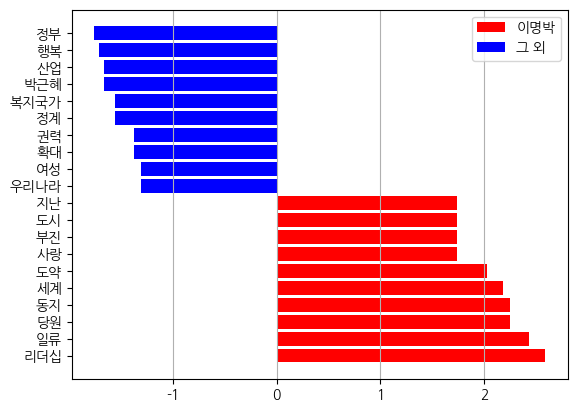

In [228]:
# 시각화 해보기
#동일한 결과 등장!

lee_odds['Log Odds ratio'] = np.log(lee_odds['이명박 Odds Ratio'])
lee_odds = lee_odds.sort_values("Log Odds ratio", ascending = False)

a = df2.head(10)
b = df2.tail(10)

df3 = pd.concat([a, b]) #이명박대통령 관련 단어 10개와 그외 대통령 관련 단어 10개

plt.barh(a.index, a['Log Odds ratio'], color = 'red', label = '이명박')
plt.barh(b.index, b['Log Odds ratio'], color = 'blue', label = '그 외')
plt.grid(axis = 'x')
plt.legend()
plt.show()

### 강사님 풀이
- 이명박 대통령 버전

In [230]:
total = []
df = pd.read_csv("speeches_presidents.csv")

for i in range(len(df)):
    a = df.iloc[i]
    president = a['president']
    text = okt.nouns(a['value'])
    box = []
    for j in text:
        if len(j) >= 2:
            box.append(j)
    counter = Counter(box).most_common()
    sample = pd.DataFrame(counter, columns = ['단어', '빈도'])
    if president == "이명박":
        sample['대통령'] = "이명박"
    else:
        sample['대통령'] = "그 외"
    total.append(sample)

In [205]:
df = pd.concat(total, ignore_index = True)
df2 = df.pivot_table(index = "단어", columns = "대통령", values = "빈도").fillna(0)

df2["그 외 ratio"] = (df2["그 외"] + 1) / sum(df2["그 외"] + 1)
df2["이명박 ratio"] = (df2['이명박'] + 1) / sum(df2["이명박"] + 1)
df2["Odds ratio"] = df2['이명박 ratio'] / df2['그 외 ratio']
df2.sort_values("Odds ratio", ascending = False)

대통령,그 외,이명박,그 외 ratio,이명박 ratio,Odds ratio
단어,,,,,
리더십,0.0,6.0,0.000346,0.004596,13.288356
일류,0.0,5.0,0.000346,0.003940,11.390020
당원,0.0,4.0,0.000346,0.003283,9.491683
동지,0.0,4.0,0.000346,0.003283,9.491683
세계,2.0,13.0,0.001038,0.009192,8.858904
...,...,...,...,...,...
복지국가,8.0,0.0,0.003113,0.000657,0.210926
박근혜,9.0,0.0,0.003459,0.000657,0.189834
산업,9.0,0.0,0.003459,0.000657,0.189834


+) 시각화

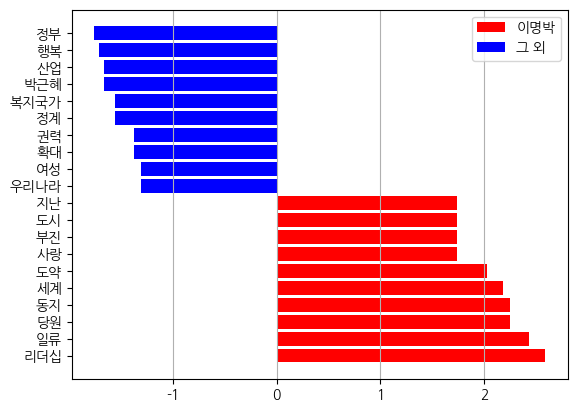

In [225]:
# 기준값은 1
# log1로 시각화하면 더 좋음
# 음수 양수 구분가능

df2['Log Odds ratio'] = np.log(df2['Odds ratio'])
df2 = df2.sort_values("Log Odds ratio", ascending = False)

a = df2.head(10)
b = df2.tail(10)

df3 = pd.concat([a, b]) #이명박대통령 관련 단어 10개와 그외 대통령 관련 단어 10개

plt.barh(a.index, a['Log Odds ratio'], color = 'red', label = '이명박')
plt.barh(b.index, b['Log Odds ratio'], color = 'blue', label = '그 외')
plt.grid(axis = 'x')
plt.legend()
plt.show()

### 강사님 풀이2

In [239]:
okt = Okt()
def make_nouns(x):
    nouns = okt.nouns(x)
    box = []
    for i in nouns:
        if len(i) >= 2:
            box.append(i)
    return box

df = pd.read_csv("speeches_presidents.csv")
df['value_nouns'] = df['value'].apply(make_nouns) #함수 적용할때는 apply!
df

,president,value,value_nouns
0,문재인,정권교체 하겠습니다! 정치교체 하겠습니다! 시대교체 하겠습니다! ‘불비불...,"[정권, 교체, 정치, 교체, 시대, 교체, 불비, 불명, 고사, 남쪽, 언덕, 나..."
1,박근혜,"존경하는 국민 여러분! 저는 오늘, 국민 한 분 한 분의 꿈이 이루어지는 행복한 대...","[존경, 국민, 여러분, 오늘, 국민, 대한민국, 만들기, 위해, 모든, 각오, 자..."
2,이명박,"존경하는 국민 여러분, 사랑하는 한나라당 당원 동지 여러분! 저는 오늘 무거운 책임...","[존경, 국민, 여러분, 사랑, 한나라당, 당원, 동지, 여러분, 오늘, 책임감, ..."
3,노무현,어느때인가 부터 제가 대통령이 되겠다고 말을 하기 시작했습니다. 많은 분들이 제게 ...,"[부터, 대통령, 시작, 무엇, 무엇, 비젼, 비젼, 생각, 마음, 가장, 비젼, ..."


In [242]:
unique_words = set()
for i in df['value_nouns']:
    for j in i:
        unique_words.add(j)

In [244]:
# DF : 단어가 몇개의 문서(대통령)에 출현했는지
DF_dic = {}
for i in unique_words:
    count = 0
    for j in df['value_nouns']:
        if i in j:
            count += 1
    DF_dic[i] = count

In [256]:
df2 = df.explode("value_nouns")[['president', 'value_nouns']]
df3 = df2.groupby(['president', 'value_nouns']).size().reset_index(name = 'TF') #groupby 후 size를 하면 빈도 구할 수 있음
df3
#TF = 출현 빈도 의미

,president,value_nouns,TF
0,노무현,가면,1
1,노무현,가슴,2
2,노무현,가야,1
3,노무현,가장,1
4,노무현,가지,1
...,...,...,...
1521,이명박,혼자,1
1522,이명박,환기,1
1523,이명박,후보,1
1524,이명박,희망,2


In [262]:
def make_DF(x):
    return DF_dic[x]

df3['DF'] = df3['value_nouns'].apply(make_DF)
df3

#TF vs DF
# TF는 한 문서에서 특정 단어가 몇 번 등장했는지
# DF는 여러 문서 중에서 특정 단어가 몇 개의 문서에 등장했는지
# TF는 특정 문서의 특성에 집중 & DF는 단어의 전반적인 빈도를 분석

,president,value_nouns,TF,DF
0,노무현,가면,1,1
1,노무현,가슴,2,3
2,노무현,가야,1,3
3,노무현,가장,1,4
4,노무현,가지,1,4
...,...,...,...,...
1521,이명박,혼자,1,2
1522,이명박,환기,1,1
1523,이명박,후보,1,3
1524,이명박,희망,2,2


In [268]:
# IDF : 총문서 / DF
df3['IDF'] = 4 / df3['DF']
df3['TF-IDF'] = df3['TF'] * df3['IDF'] #다른 문서에 비해서 어떤 단어가 두드러지는가
df3

,president,value_nouns,TF,DF,IDF,TF-IDF
0,노무현,가면,1,1,4.000000,4.000000
1,노무현,가슴,2,3,1.333333,2.666667
2,노무현,가야,1,3,1.333333,1.333333
3,노무현,가장,1,4,1.000000,1.000000
4,노무현,가지,1,4,1.000000,1.000000
...,...,...,...,...,...,...
1521,이명박,혼자,1,2,2.000000,2.000000
1522,이명박,환기,1,1,4.000000,4.000000
1523,이명박,후보,1,3,1.333333,1.333333
1524,이명박,희망,2,2,2.000000,4.000000


In [274]:
df3[df3['president'] == '문재인'].sort_values('TF-IDF', ascending = False)

,president,value_nouns,TF,DF,IDF,TF-IDF
358,문재인,나라,26,3,1.333333,34.666667
493,문재인,복지국가,8,1,4.000000,32.000000
694,문재인,일자리,21,3,1.333333,28.000000
529,문재인,산업,14,2,2.000000,28.000000
623,문재인,여성,6,1,4.000000,24.000000
...,...,...,...,...,...,...
435,문재인,마음,1,4,1.000000,1.000000
308,문재인,과거,1,4,1.000000,1.000000
453,문재인,무엇,1,4,1.000000,1.000000
455,문재인,문제,1,4,1.000000,1.000000


### 강사님 풀이3 : 라이브러리 이용

In [293]:
from sklearn.feature_extraction.text import TfidfVectorizer

model = TfidfVectorizer()

df['cb_nouns'] = df['value_nouns'].apply(lambda x : " ".join(x))

tf_idf = model.fit_transform(df['cb_nouns'])

result = pd.DataFrame(tf_idf.toarray(), index = df['president'], columns = model.get_feature_names_out())
result

,가난,가동,가득,가르침,가면,가사,가슴,가야,가장,가족,...,후보,훈련,훗날,휴전선,흉탄,흐름,흡수,희망,희망이,희생
president,,,,,,,,,,,,,,,,,,,,,
문재인,0.00000,0.016866,0.016866,0.016866,0.000000,0.016866,0.021531,0.021531,0.026404,0.021531,...,0.000000,0.00000,0.016866,0.016866,0.00000,0.016866,0.016866,0.053190,0.00000,0.026595
박근혜,0.01738,0.000000,0.000000,0.000000,0.000000,0.000000,0.011094,0.011094,0.027209,0.011094,...,0.011094,0.01738,0.000000,0.000000,0.01738,0.000000,0.000000,0.000000,0.01738,0.000000
이명박,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018135,0.022182,...,0.022182,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.054798,0.00000,0.027399
노무현,0.00000,0.000000,0.000000,0.000000,0.037357,0.000000,0.047688,0.023844,0.019494,0.000000,...,0.071533,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000


In [301]:
columns = model.get_feature_names_out()

for i in range(len(result)):
    a = result.iloc[i]
    idx = np.argsort(a)[-5:]
    print(columns[idx])

['우리' '국민' '산업' '일자리' '나라']
['박근혜' '여러분' '정부' '행복' '국민']
['리더십' '세계' '국민' '대한민국' '나라']
['공식' '개편' '비젼' '권력' '정계']
